Imports

In [1]:
import numpy as np
from utils.dawnplot import *
from utils.dawnfrb import FRBInfo

catalog = FRBInfo(
    '/home/jovyan/work/chime_data/21.0007/',
    '/home/jovyan/work/chime_data/23.0004/',
    remove_duplicates=True
)

Get Data

In [2]:
timeSeries = catalog['ts']
modelTimeSeries = catalog['model_ts']

In [3]:
plot = BokehInterface(
    views=[
        EmbeddingView(
            title='model_ts_fft',
            data=modelTimeSeries,
            reducer=FFT_UMAP(
                norm_inputs=True,
                n_neighbors=15,
                min_dist=0.1,
                metric='euclidean',
                verbose=True,
            ),
        ),
        EmbeddingView(
            title='ts_fft',
            data=timeSeries,
            reducer=FFT_UMAP(
                norm_inputs=True,
                n_neighbors=15,
                min_dist=0.1,
                metric='euclidean',
                verbose=True,
            ),
        ),
    ],
    plot_elements=[
        ColorTooltipData(
            title='width_ms',
            data=[i*1000 for i in catalog['width_fitb']],
        ),
        ColorMap(
            title='scattering_ms',
            data=[i*1000 for i in catalog['scat_time']],
        ),
        ColorMap(
            title='scatterfit',
            data=["✔️" if i else "❌" for i in catalog['scatterfit']],
            high_transparent=False,
        ),
        ColorMap(
            title='known_repeater',
            data=["✔️" if rp != -9999.0 else "❌" for rp in catalog['repeater_name']],
            high_transparent=False,
        ),
        ColorMap(
            title='ts_embedding_label',
            data=[str(l) for l in catalog['ts_embedding_label']],
        ),
        TooltipData(
            title='tns_name',
            data=catalog['tns_name'],
        ),
        TooltipGraph(
            TimeSeriesFFTProcessor().transform(modelTimeSeries),
            TimeSeriesFFTProcessor().transform(timeSeries),
            title='modelTimeSeriesFFT',
        ),
    ],
)

UMAP(n_jobs=4, verbose=True)
Tue Aug 22 11:45:17 2023 Construct fuzzy simplicial set
Tue Aug 22 11:45:18 2023 Finding Nearest Neighbors
Tue Aug 22 11:45:19 2023 Finished Nearest Neighbor Search
Tue Aug 22 11:45:20 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Aug 22 11:45:23 2023 Finished embedding
UMAP(n_jobs=4, verbose=True)
Tue Aug 22 11:45:23 2023 Construct fuzzy simplicial set
Tue Aug 22 11:45:23 2023 Finding Nearest Neighbors
Tue Aug 22 11:45:23 2023 Finished Nearest Neighbor Search
Tue Aug 22 11:45:23 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Aug 22 11:45:26 2023 Finished embedding


In [4]:
plot.PLOT_DF['marker'] = ['star' if rp != -9999.0 else 'circle' for rp in catalog['repeater_name']]
plot.PLOT_DF['size'] = [20 if rp != -9999.0 else 6 for rp in catalog['repeater_name']]
plot.init_plot_elements()
plot.plotPoints.glyph.size='size'
plot.plotPoints.glyph.marker = 'marker'
# plot.plotPoints.glyph.line_alpha=1
plot.plotPoints.glyph.line_color='black'
# plot.plotPoints.glyph.fill_alpha=1
# plot.plotPoints.glyph.line_width='outline'
plot.show()

Loading BokehJS ...

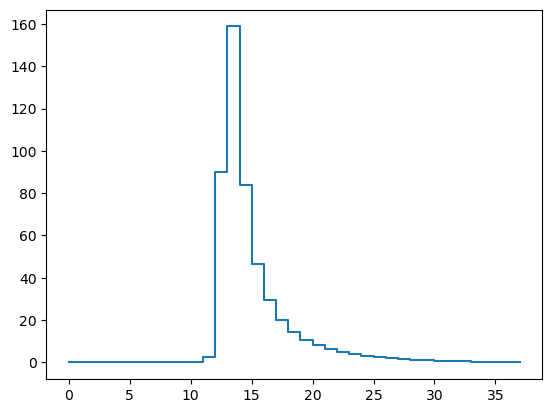

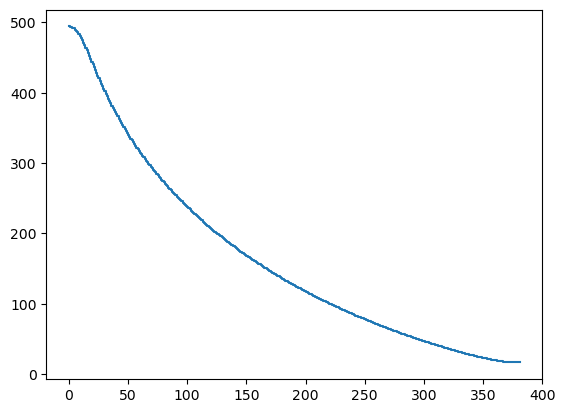

In [61]:
import matplotlib.pyplot as plt
plt.plot(modelTimeSeries[4],drawstyle='steps-post')
plt.show()
plt.plot(TimeSeriesFFTProcessor(norm_inputs=False).transform(modelTimeSeries)[4],drawstyle='steps-post')